# Inferência Causal: Viéses e os Modelos Contrafactuais
Prof. Daniel de Abreu Pereira Uhr

### Conteúdo

* Modelos Causais Gráficos (Directed Acyclic Graph - DAG´s)
* Covariáveis e Variáveis de Controle
    * Good Controls
    * Bad Controls


### Referências

* Pearl, J. (2000). Causality: Models, reasoning, and inference. Cambridge University Press.
* Spirtes, P., Glymour, C., & Scheines, R. (2000). Causation, prediction, and search. MIT press.
* Joshua D. Angrist and Jörn-Steffen Pischke (2009). Mostly Harmless Econometrics: An Empiricist's Companion. Princeton University Press.
* Morgan, S. L., & Winship, C. (2014). Counterfactuals and causal inference: Methods and principles for social research. Cambridge University Press. Capítulo 3.
* Cunningham, S. W. (2013). Causal inference: The mixtape. https://www.scunning.com/mixtape.html
* Facure, Matheus. Causal Inference for Brave and True. https://matheusfacure.github.io/python-causality-handbook/landing-page.html 
* Hernan, M. Causal Inference: What If (the book). https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/ 
* Matsueda, Ross L. 2012. “Handbook of Structural Equation Modeling.” In. Guilford Press.
* Heckman, James, and Rodrigo Pinto. 2015. “Causal Analysis After Haavelmo.” Econometric Theory 31 (1): 115–51.
* Imbens, Guido W. 2019. “Potential Outcome and Directed Acyclic Graph Approaches to Causality: Relevance for Empirical Practices in Economics.” NBER Working Paper Series. https://doi.org/10.3386/w26104.


### Modelos Causais Gráficos (Directed Acyclic Graph - DAG´s)

#### Contexto

A história da modelagem causal gráfica remonta ao início do século XX e a Sewall Wright, um dos pais da genética moderna e filho do economista Philip Wright. Sewall desenvolveu diagramas de caminhos para a genética, e acredita-se que Philip os adaptou para identificação econométrica.

Mas, apesar desse início promissor, a utilização de modelos gráficos para inferência causal não é dominante, com algumas excepções (Heckman e Pinto 2015; Imbens 2019). Foi **revitalizado para fins de inferência causal** quando o **cientista da computação e vencedor do Prêmio Turing Judea Pearl** os adaptou para seu **trabalho em inteligência artificial**. Ele explicou isso em sua  teoria geral de inferência causal que expõe a utilidade de sua notação gráfica direcionada (Pearl, 2009). 

#### Aspectos Gerais

**Definição Geral**

Um gráfico acíclico direcionado (DAG) é uma representação conceitual de uma série de variáveis. A ordem das variáveis é representada por um gráfico, que é apresentado visualmente como um conjunto de círculos, cada um representando uma variável, alguns dos quais conectados por linhas, que representam o fluxo de uma para outra. Cada círculo é conhecido como “vértice” (nódulo) e cada linha é conhecida como “aresta” (setas direcionais). “Dirigido” significa que cada aresta (seta) tem uma direção definida, portanto cada aresta representa necessariamente um único fluxo direcional de um vértice para outro. “Acíclico” significa que não há *loops* (ou seja, “ciclos”) no gráfico, de modo que para qualquer vértice, se você seguir uma aresta que conecta esse vértice a outro, não haverá caminho no gráfico para voltar.

**DAG´s na Econometria**

Judea Pearl (2000) desenvolveu um conjunto de regras para representar o relacionamento econométrico causal com teoria a gráfica. E um **modelo gráfico causal** é uma forma de representar como a causalidade funciona em termos do que causa o quê. O critério de avaliação de Pearl (2000) para estratégias de condicionamento é uma **generalização de diversas tradições** para resolver problemas associados ao viés de variáveis omitidas (fatores de confusão). A teoria moderna de diagramas para inferência causal surgiu dentro das disciplinas de ciência da computação e inteligência artificial.

Importante, os DAGs explicam a causalidade em termos de **contrafactuais**. Ou seja, um efeito causal é definido como uma **comparação entre dois estados do mundo** um estado que realmente aconteceu quando alguma intervenção assumiu algum valor e outro estado que não aconteceu (o “contrafactual”) sob alguma outra intervenção. Veremos de forma mais detalhada o que são contrafactuais posteriormente.

**Sumarizando a estrutura dos DAGs**
* A estrutura de modelagem gráfica não permite a representação de causa simultânea.
* Um **circulo solido** (nódulo) representa uma **variável aleatória observável**.
* Um **círculo não solido** representa uma **variável aleatória não observada**.
* **Causas** são representadas pelas **setas direcionais**.
* As **curvas pontilhadas bidirecionais** representam que as duas variáveis são **mutuamente dependentes de alguma causa comum** (usualmente não observada).

**Observação:** Existem semestres inteiros em modelos gráficos. Essa aula não tem a intenção de compreender em profundidade os modelos gráficos. Apenas apresentar os elementos básicos para relacionar a representação gráfica e o uso das técnicas econométricas de identificação causal.


### Independência e Independência Condicional

**Independência**

**A independência entre duas variáveis aleatórias (ou eventos) significa que o conhecimento sobre o valor de uma delas não fornece nenhuma informação sobre a outra. Em termos simples, duas variáveis são independentes se o conhecimento sobre o valor de uma não altera a probabilidade de diferentes valores para a outra.**

Em termos matemáticos, duas variáveis aleatórias (eventos), A e B, são independentes se **a probabilidade de A ocorrer não é afetada pela ocorrência de B** (e vice-versa):

$$
P(A \cap B) = P(A) \times P(B)
$$

**Independência Condicional**

A independência condicional ocorre quando **a relação de independência entre duas variáveis aleatórias é mantida, considerando uma terceira variável**. A independência condicional implica que, dado o valor de uma terceira variável, as duas variáveis originais são independentes. 

Então, em termos matemáticos, A e B são **independentes condicionalmente a uma terceira variável C** se, dadas as informações sobre C, a ocorrência de A não afeta a probabilidade de B e vice-versa:

$$
P(A \cap B | C) = P(A|C) \times P(B|C)
$$


**Representação Econométrica**

Suponha uma variável de resposta $Y$, uma variável que representa o resultado de interesse. A variável de resposta pode assumir dois estados da natureza, resultado caso o indivíduo tenha sido tratado ($Y_1$), ou um resultado caso o indivíduo não tenha sido tratado ($Y_0$). Caso a atribuição do tratamento ocorresse de forma independente sobre os indivíduos da amostra, dizemos que $D$ é independente de $Y_0$ e $Y_1$, ou seja, $D$ é independente de $Y$:

$$
(Y_0, Y_1) \perp D
$$

Em outras palavras, o potencial resultado na ausência e na presença do tratamento é independente da própria aplicação do tratamento. 


Vejamos agora o conceito de **independência condicional**. Considere que a variável de resposta $Y$ pode assumir um resultado caso o indivíduo seja tratado ($D=1$) ou não ($D=0$). A independência condicional à variável $X$ significa que o efeito do tratamento $D$ sobre $Y$ é o mesmo para todos os valores (todas as condições) de $X$. Ou seja, $Y_0$ e $Y_1$ são independentes de $D$ condicionado a $X$. Formalmente:

$$
(Y_0, Y_1) \perp D | X
$$

implica que os resultados potenciais $Y_0$ e $Y_1$ são independentes da variável de tratamento $D$ quando consideramos a informação contida na variável $X$. Em outras palavras, o potencial resultado na ausência e na presença do tratamento é independente da aplicação do tratamento, dada a informação contida em $X$.

A **independência** e a **independência condicional** são **centrais para a inferência causal**. No entanto, pode ser bastante desafiador entendê-los. Mas isto pode mudar se usarmos a linguagem correta para descrever este problema. É aqui que entram os modelos gráficos causais. Logo, vamos nos aprofundar nos modelos gráficos causais para entender a relação entre independência e independência condicional.

### Estruturas básicas das DAGs

Na figura abaixo (Figure 3.2.) os dois gráficos apresentados nos painéis (a) e (b) da Figura 3.2 são equivalentes. A forma abreviada de representação em (a) pode ser útil para suprimir um conjunto complexo de relações causais que seriam irrelevantes para alguma a análise empírica.

<div style="text-align:center;">
    <img src="images\DAG32.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

A Figura 3.3 apresenta os **três padrões básicos de relações causais** que seriam observados para **três variáveis relacionadas entre si**: uma *cadeia de mediação*, *dependência mútua* e *causalidade mútua*. A análise de Pearl para os dois primeiros tipos de relacionamento é convencional. 

Para o gráfico no painel (a), A afeta B por meio do efeito causal de A em C e do efeito causal de C em B. Esse tipo de cadeia causal torna as variáveis A e B incondicionalmente associadas (*"incondicional" porque não depende de outras condições ou variáveis*). 

Para o gráfico no painel (b), A e B são ambos causados por C. Aqui, A e B também são incondicionalmente associados, mas agora é porque eles dependem mutuamente de C.

<div style="text-align:center;">
    <img src="images\DAG33.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

Ainda pela Figura 3.3, C é chamada de **"variável de colisão"** (colisora ou "Collider"). Formalmente, uma variável é uma colisora ao longo de um caminho específico se tiver duas setas apontando para ela. Figurativamente, os efeitos causais de A e B "colidem" um com o outro em C. 

Variáveis colisoras são comuns em aplicações de ciências sociais: **Qualquer variável endógena que tenha duas ou mais causas é uma colisora** ao longo de algum caminho. A linguagem de Pearl é bastante útil aqui. **O caminho A→C←B não gera uma associação entre A e B** porque a variável colisora C "bloqueia" os possíveis efeitos causais de A e B um no outro.

A importância da variável colisora está relacionada à forma como ela pode afetar as relações causais e associações entre outras variáveis no contexto de análise causal. Quando você tem uma variável colisora, a associação entre as variáveis que a alimentam é bloqueada, **tornando-as condicionalmente dependentes uma da outra, dada a variável colisora**.

**Isso pode ser um problema se não for adequadamente considerado em uma análise causal**. Se não for tratada corretamente, **a presença de uma variável colisora pode levar a interpretações incorretas sobre a relação causal entre outras variáveis**. Um manuseio descuidado das variáveis colisoras pode criar dependências condicionais que podem afetar negativamente a análise causal e levar a conclusões equivocadas.

Portanto, é fundamental entender e considerar as variáveis colisoras de maneira apropriada ao realizar análises causais, para garantir interpretações corretas e precisas das relações causais entre as variáveis envolvidas. A consideração cuidadosa das variáveis colisoras é uma parte importante da metodologia de análise causal.

#### Exemplo 1

Neste DAG (Figure 3.5), temos três variáveis ​​aleatórias: $C$, $D$ e $Y$. Existe um caminho direto de $D→Y$ que representa um efeito causal. Mas há também um segundo caminho a partir de $D$ para $Y$ chamado de caminho da porta dos fundos ($D←C→Y$). Embora o caminho direto seja um efeito causal, o caminho backdoor não é causal. Pelo contrário, é um processo que cria correlações espúrias entre $D$ e $Y$ que são impulsionados apenas pelas flutuações na variável aleatória $C$.

Aqui chamamos $C$ de um **fator de confusão** (Confounding Variable) porque determina conjuntamente $D$ e $Y$.


<div style="text-align:center;">
    <img src="images\DAG34.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

### Critérios de Identificação Causal (Back-Door Criterion)

Segundo Pearl, para que não haja viés nas estimações, o pesquisador deve **fechar os caminhos de portas-dos-fundos** entre $D$ e $Y$ ("Satisfy the Back-Door Criterion"). Considerando a figura 3.5 (Figure 3.5), temos um diagrama causal onde o efeito de $D$ é confundido por $C$. Ou seja:

$$Y \not \perp D$$



Nesse caso, satisfazer o critério de porta dos fundos significa que o pesquisador deve controlar $C$ para que o efeito de $D$ em $Y$ seja identificável (independente). Em outras palavras, **o pesquisador deve condicionar nas variáveis que bloqueiam todos os caminhos de porta dos fundos** entre $D$ e $Y$.


$$
Y \perp D | C
$$




Isso significa, por exemplo, que ao considerarmos a variável $C$ na regressão linear de $D$ em $Y$, fechamos todos os caminhos de portas dos fundos.

$$ Y = \alpha + \beta D + \gamma C + \epsilon $$

Logo, **controlamos** o caminho de porta dos fundos ao adicionar a covariável no modelo de regressão.


#### Exemplo 2

<div style="text-align:center;">
    <img src="images\DAG1.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

Vimos que para identificar o efeico causal, devemos satisfazer o criério de porta dos fundos. Ou seja, o procedimento é controlar os caminhos de portas dos fundos! 


**Pergunta**: conseguimos estimar o efeito causal de $D$ sobre $Y$ (Figura 1.1.) se rodarmos as regressões abaixo?

$$ Y = \alpha + \beta D + \epsilon $$
$$ Y = \alpha + \beta D + \theta G + \epsilon $$
$$ Y = \alpha + \beta D + \theta G + \phi B + \epsilon $$

Qual sua opinião?

**Observação:** G é uma preditora de Y. No final da aula comentaremos detalhadamente sobre a definição e o uso das variáveis de controle.


<div style="text-align:center;">
    <img src="images\DAG1.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

E se rodarmos as regressões:

$$ Y = \alpha + \beta D + \theta A + \epsilon $$
$$ Y = \alpha + \beta D + \rho F + \epsilon $$

O que você acha agora?


Considerando C um vetor de variáveis. Que tal utilizar o seguinte procedimento:

$$ D = \sigma + \rho C + \epsilon $$
$$ Y = \alpha + \beta \hat{D} + \epsilon $$

Será que resolve o problema de porta dos fundos? Teremos a identificação causal de D em Y?


### Procedimentos para Estimação Causal

**O ponto chave é que o condicionamento em variáveis que estão ao longo do caminho de porta dos fundos pode ser uma estratégia efetiva para identificação causal.**

Segundo Pearl, as 3 estratégias básicas para estimar o efeito causal são:

   * 1. **Condicionar nas variáveis** (matching, weighting, regressão) que bloqueiam todos os caminhos de portas dos fundos até $Y$.

   * 2. **Variação Exógena** com uma **variável instrumental** apropriada para isolar a covariância nas variáveis causais e de resultado.

   * 3. Estabelecer e isolar um **mecanismo completo** que relacione a variável causal para variável de resultado e então calcular o efeito causal e como isso se propaga dentro do mecanismo.

Então, esse arcabouço é importante em dois aspectos:
* Pesquisadores **não precisam condicionar em todas causas diretas omitidas** de uma variável de resultado para resolver o problema de variável omitida.
* Pesquisadores precisam **condicionar minimamente** o suficiente conjunto de variáveis que mantenham os caminhos de portas dos fundos bloqueados.

O condicionamento é uma estratégia poderosa para estimar efeitos causais, e é bem-sucedida e completamente transparente para exemplos simples como vimos. No entanto, é um procedimento muito mais complicado em geral do que é sugerido pela nossa breve descrição. As complicações surgem quando variáveis colisoras estão presentes, e Pearl explicou como resolver essas complicações.

**Em termos gerais**

Se um ou mais caminhos de porta dos fundos conectam a variável causal à variável de resultado, Pearl mostra que **o efeito causal é identificado ao condicionar em um conjunto de variáveis** $Z$ se e somente se os caminhos de porta dos fundos entre a variável causal e a variável de resultado são bloqueados após a condicionamento em $Z$. Ele então prova que todos os caminhos de porta dos fundos são bloqueados por Z se e somente se cada caminho de porta dos fundos: 

* 1. Contém dependência mútua $A←C→B$, onde a variável intermediária $C$ está em $Z$, ou 
* 2. Contém uma cadeia de mediação $A→C→B$, onde a variável intermediária $C$ está em $Z$, ou 
* 3. Contém causalidade mútua $A→C←B$, onde a variável intermediária $C$ e todos os descendentes de $C$ não estão em $Z$. 

A condição 1 é bem clara porque trata-se de controlar pelas variáveis confundidoras. A condição 2 indica o condicionamento nas variáveis mediadoras, essa condição deve ser feita com atenção. Já a condição 3 não é intuitiva, mas há recomendação é de não condicionar a análise em variáveis colisoras.


#### Variáveis colisoras (Colliders)

A variável dependente defasada é por natureza uma variável colisora. Em áreas como sociologia e antropologia muitos artigos utilizavam variáveis dependentes defasadas como variáveis de controle.
A ideia do uso dessas variáveis recaia sobre o argumento de que um possível efeito confudidor (variável confusora) não observável pode ser controlada ao inserir na equação de regressão uma variável dependente defasada. Em outras palavras, os efeitos do confudidor não observado podem ser decompostos em um processo defasado e duas variáveis não observadas separadas.

Ou seja, saímos do problema da Figura 3.5 e temos agora o problema representado pela Figura 3.6.

<div style="text-align:center;">
    <img src="images\DAG35.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

Para o DAG na Figura 3.6, existem duas vias de porta dos fundos de $D$ para $Y$: 
* D←V→Yt−1→Y 
* D←V→Yt−1←U→Y. 

A variável de resultado defasada $Y_{t−1}$ está ao longo dessas duas vias de porta dos fundos, mas $Y_{t−1}$ não satisfaz o critério da porta dos fundos. Primeiramente, observe que $Y_{t−1}$ bloqueia a primeira via de porta dos fundos, D←V→Yt−1→Y, porque, para essa via, $Y_{t−1}$ é a variável intermediária em uma cadeia de mediação V→Yt−1→Y. No entanto, para a segunda via, D←V→Yt−1←U→Y, $Y_{t−1}$ é um colisor porque é a variável intermediária em mutual causation V→Yt−1←U. E, como resultado, o critério da porta dos fundos afirma que, após condicionar em $Y_{t−1}$, pelo menos uma via de porta dos fundos de D para Y permanecerá desbloqueada. Para este exemplo, é a segunda via que inclui o colisor.

**Considerações gerais sobre a variável colisora**

Não se deve utilizar variáveis colisoras no condicionamento porque isso pode desbloquear caminhos de porta dos fundos e, consequentemente, introduzir associações espúrias entre as variáveis que estão ao longo desses caminhos. Quando condicionamos em uma variável colisora, estamos, de fato, removendo o bloqueio causado por essa variável no caminho de porta dos fundos. Isso pode levar a associações falsas ou distorcidas entre as variáveis de interesse, pois os efeitos causais indiretos são agora permitidos ao longo do caminho que inclui a variável colisora.

Para entender por que isso é problemático, é crucial lembrar que uma variável colisora, ao longo de um caminho de porta traseira, age como um ponto de convergência para diferentes causas. Ela absorve os efeitos causais das variáveis que a alimentam, bloqueando a associação direta entre essas variáveis. No entanto, se condicionarmos nessa variável colisora, estamos "liberando" esses efeitos, criando associações espúrias entre as variáveis.

A utilização de **variáveis colisoras no condicionamento** pode, assim, **introduzir vieses e confusão na análise causal**, levando a conclusões incorretas sobre a relação causal entre as variáveis envolvidas. Portanto, a recomendação é evitar o condicionamento em variáveis colisoras para garantir que as associações e estimativas de efeitos causais sejam precisas e não distorcidas pela presença dessas variáveis de convergência.

### Viéses na Análise Causal

Os modelos gráficos nos permitem diagnosticar com quais preconceitos estamos lidando e quais são as ferramentas que precisamos para corrigi-los.

**Viés por Variável Omitida (Omitted Variable Bias)**

O viés por variável omitida ocorre quando uma variável relevante (observável ou não observável) que afeta tanto a variável de interesse (resultado $Y$) quanto a variável explicativa (tratamento, $D$) está ausente no modelo econométrico, levando a uma estimativa enviesada do efeito da variável explicativa sobre a variável de interesse. O viés por variável omitida é **resultado da não inclusão de uma variável importante no modelo**, levando a uma inferência incorreta sobre a relação entre as variáveis incluídas no modelo.

* Exemplo: Suponha que estivéssemos estudando a relação entre consumo de sorvete e afogamentos. Se não levarmos em conta o fato de que há uma variável omitida, como a temperatura do ambiente (que afeta tanto o consumo de sorvete quanto a frequência de idas à praia, influenciando os afogamentos), poderíamos erroneamente concluir que o consumo de sorvete causa mais afogamentos. Precisamos controlar a variável temperatura (fechar esse caminho de porta dos fundos, $Afogamentos \perp Sorvetes | Temperatura$) para obter uma estimativa não enviesada do efeito do consumo de sorvete sobre os afogamentos.


**Viés de Seleção (Selection Bias)**

Refere-se a uma **distorção sistemática nos resultados** de uma análise estatística devido a um **processo de seleção não aleatório de indivíduos ou observações** na amostra de dados. O viés de seleção pode surgir em várias situações, como quando a **seleção para a amostra** é influenciada por características não observadas dos indivíduos ou quando há uma não aleatoriedade na participação na pesquisa.

* Exemplo: Imagine uma pesquisa sobre a eficácia de um novo método de gestão da cadeia de suprimentos para melhorar a eficiência operacional. A pesquisa deseja avaliar o impacto desse método nas taxas de produção e na eficiência global. No entanto, esse método de gestão é realizado em unidades de produção conhecidas por serem mais avançada tecnologicamente e terem equipes altamente qualificadas. Neste caso, há um viés de seleção porque a amostra escolhida não representa a diversidade de situações nas quais o método pode ser aplicado.


Formalmente, ambos implicam em **violação da hipótese de exogeneidade estrita**, e de covariância sistemáticamente diferente de zero entre o termo de erro e ao menos uma variável explicativa do modelo.


**Observação:** A **associação** refere-se a uma relação estatística ou empírica entre duas variáveis. Se duas variáveis estão associadas, significa que há uma relação estatística entre elas, mas essa relação não implica necessariamente uma relação de causa e efeito. Considerando o exemplo do sorvete e dos afogamentos, pode haver uma associação entre o consumo de sorvete e o número de afogamentos em uma praia durante o verão, mas isso não significa que o sorvete cause afogamentos.

#### Viés de Seleção (Selection Bias)

Quais poderiam ser as razões para a não aleatoriedade na participação na pesquisa? Em termos gerais:

* 1. Auto-seleção: os indivíduos escolhem se participam ou não da pesquisa.
* 2. Viés de sobrevivência: os indivíduos que sobrevivem até o momento da pesquisa são diferentes dos que morreram antes.
* 3. Amostragem Seletiva: A amostra é selecionada de forma não aleatória, talvez devido a restrições práticas, preferências dos pesquisadores ou disponibilidade de dados. 
* 4. Não resposta: os indivíduos selecionados para a amostra não respondem à pesquisa.
* 5. Amostragem de resposta exagerada: às vezes há uma tendência de incluir mais respondentes do que o necessário ou uma sobre-representação de determinados grupos, o que pode distorcer as conclusões.
* 6. Amostragem de resposta insuficiente: O oposto do caso anterior, onde há uma sub-representação de respondentes, o que também pode levar a conclusões enviesadas.
* 7. Entre outros...

##### Viés de Seleção pelo Tratamento (Selection Bias)

O viés de **seleção pelo tratamento é uma forma específica de viés de seleção** que ocorre em estudos ou experimentos nos quais a seleção dos participantes está relacionada ao tratamento que estão recebendo. Isso pode distorcer as conclusões e interpretações dos resultados, especialmente em estudos de causalidade e intervenções.

* **Autoseleção no Tratamento**: Os indivíduos podem optar por participar ou aderir a um determinado tratamento com base em suas características ou preferências pessoais. Ou seja, os participantes que optam por aderir ao tratamento podem ter características diferentes daqueles que optam por não aderir. Isso pode levar a uma amostra de tratamento que não é representativa da população em geral.
* **Viés de desistência** (Atrito): Quando os participantes desistem ou abandonam um tratamento antes da conclusão do estudo, isso pode introduzir um viés, especialmente se a desistência estiver relacionada à eficácia ou tolerabilidade do tratamento.

Assim, podemos nos referir a vieses devido à **presença de causas comuns como "confusão"** e àqueles **devidos ao condicionamento em efeitos comuns como "viés de seleção"**. Essa definição fornece uma classificação clara de confusão e viés de seleção, embora possa não coincidir perfeitamente com a terminologia tradicional de algumas disciplinas. 

Por exemplo, **estatísticos e econometristas** muitas vezes usam o termo **"viés de seleção"** para se referir a ambos os tipos de viés. A lógica é que, em ambos os casos, o viés é devido à seleção: seleção de indivíduos para a análise (o "viés de seleção" estrutural) ou seleção de indivíduos para o tratamento (a "confusão" estrutural). Por essa mesma razão, os cientistas sociais frequentemente se referem a **confusão não observada** como **seleção em não observáveis**, para enfatizar que, independentemente dos termos escolhidos, existem duas estruturas causais distintas que levam ao viés.

### DAG como representação de experimentos

Considere que a variável $D$ representa uma variável indicativa (0 ou 1), indicando 1 se os indivíduos receberam o tratamento, e 0 caso contrário. A variável $Y$ representa a variável de resultado de interesse.

Repare que com esse conceito em mente, o DAG simples (Figura 3.5) permacene o mesmo, entretanto teremos mais profundidade na análise. 

<div style="text-align:center;">
    <img src="images\DAG34.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

Agora conseguimos enxergar o DAG como um experimento. Ou seja, o DAG representa o experimento onde os indivíduos recebem o tratamento ou não ($D$). E existem variáveis variáveis confundidoras ($C$) que afetam a variável de resultado ($Y$) e o tratamento ($D$).

Agora, essas confundidoras podem ser vistas como variáveis que afetam a probabilidade de receber o tratamento. Ou seja, no contexto de seleção da amostra, essa variável pode influenciar se o indivíduo escolhe ou não adotar o tratamento. Nesse entendimento, conseguimos usar as DAGs para controlar fontes de viés de seleção.

#### Mais sobre o Viés de Seleção pelo Tratamento

**Definições adicionais importantes**

* **Tratamento "Não Ignorável" (Non-Ignorable Treatment)**: Um tratamento é considerado "não ignorável" quando a associação entre o tratamento e o resultado não pode ser controlada ou ajustada apenas pelas variáveis observadas. Nesses casos, há a **presença de confundimento não observado** ou variáveis latentes que afetam tanto a seleção do tratamento quanto o resultado, e não podem ser ignorados ao estimar o efeito causal. 

* **Tratamento "Ignorável" (Ignorable Treatment)**: Um tratamento é considerado "ignorável" se a associação entre o tratamento (a variável de exposição) e o resultado (a variável de interesse) pode ser adequadamente controlada ou ajustada por meio de outras variáveis observadas. Em outras palavras, se as condições de ignorabilidade são satisfeitas, podemos confiar nas estimativas dos efeitos causais mesmo sem observar todas as variáveis relevantes. Isso é fundamental para a inferência causal em estudos observacionais.

<div style="text-align:center;">
    <img src="images\DAG37.PNG"  alt="Imagem" style="width: 500px;"/>
</div>

**Mais definições relacionadas à Seleção pelo Tratamento**

<div style="text-align:center;">
    <img src="images\DAG38.PNG"  alt="Imagem" style="width: 500px;"/>
</div>


* **Seleção em Observáveis (Selection on Observables):** A seleção em observáveis refere-se à situação em que a seleção das unidades para um tratamento ($D$) é influenciada por variáveis observáveis ($Z$). Em outras palavras, as características ou atributos conhecidos das unidades afetam a probabilidade de serem selecionadas para receber o tratamento. Nesse cenário, é possível controlar o viés resultante ao levar em consideração e ajustar as diferenças nas características observáveis entre os grupos de tratamento e controle. Em outras palavras, os componentes observáveis influenciam a seleção para o tratamento (auto-seleção) e o resultado ($Y$).


* **Seleção em Não-Observáveis (Selection on Unobservables):** A seleção em não-observáveis ocorre quando a seleção das unidades para o tratamento é influenciada por variáveis não observadas que não estão disponíveis para o pesquisador. Essas variáveis não observadas podem estar correlacionadas tanto com a seleção para o tratamento quanto com o resultado, levando a um viés não observável. Em outras palavras, algum(s) componente(s) do termo não observado ($U$) influencia tanto a seleção para o tratamento (auto-seleção) quanto o resultado ($Y$). Nesse cenário, não é possível controlar o viés resultante, mesmo que todas as variáveis observáveis sejam levadas em consideração e ajustadas.

### Praticando com DAGs no Python

Para você criar graficos causais no Python (Jupyter Notebook) é preciso instalar o programa Graphviz (https://graphviz.org/download/). Para Windows, baixe o arquivo executável e instale. Depois reinicie o computador. Depois disso, temos que instalar o pacote no Python (`pip install graphviz`).

Acredito ser importate utilizar a aborgadem de representação gráfica para sistematizar a análise e fundamentar a identificação causal.

In [2]:
# Importando o pacote
import graphviz as gr

#### DAG 1 - Confounding Variable / Viés de Seleção pelo Tratamento.

Neste DAG, temos três variáveis ​​aleatórias: $X$, $D$, e $Y$. Existe um caminho direto de $D$ para $Y$, o que representa um efeito causal. Esse caminho é representado por $D→Y$. Mas há também um segundo caminho a partir $D$ para $Y$ chamado de *caminho da porta dos fundos*. O caminho da porta dos fundos é $D ← X → Y$. Embora o caminho direto seja um efeito causal, o caminho backdoor não é causal. Pelo contrário, é um processo que cria correlações espúrias entre $D$ e $Y$ que são impulsionados apenas pelas flutuações no $X$ variável aleatória.

* O viés devido a confusora ocorre quando há uma variável confusora (ou covariável) que afeta tanto o tratamento quanto o resultado.
* O viés de seleção pelo tratamento ocorre quando a probabilidade de receber o tratamento é influenciada por fatores que também afetam o resultado.

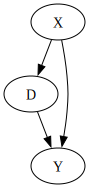

In [3]:
# Gráfico indicando as variáveis e suas relações
g = gr.Digraph()
g.edge("D", "Y")
g.edge("X", "D")
g.edge("X", "Y")
g


#### DAG 2 
Esse exemplo é sutilmente diferente do primeiro. No exemplo anterior, $X$ foi observado. Sabemos que isso foi observado porque as arestas diretas de $X$ para $D$ e $Y$ eram linhas sólidas. Mas às vezes existe um fator de confusão que não é observado e, quando existe, representamos suas bordas diretas com linhas tracejadas.

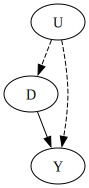

In [4]:
# Gráfico indicando as variáveis e suas relações
g = gr.Digraph()
g.edge("D", "Y")
g.edge("U", "D", style="dashed")
g.edge("U", "Y", style="dashed")
g

#### DAG 3

De acordo com o modelo de capital humano de Becker, a educação aumenta o produto marginal de uma pessoa e, uma vez que os trabalhadores recebem o seu produto marginal em mercados competitivos, a educação também aumenta os seus rendimentos. Mas a educação universitária não é aleatória; é escolhido de forma ideal, dadas as preferências subjetivas e as restrições de recursos de um indivíduo. Representamos isso com o seguinte DAG. Como sempre, deixe $D$ ser o tratamento (por exemplo, educação universitária) e $Y$ ser o resultado de juros (por exemplo, lucros). Além disso, deixe $EP$ ser a educação dos pais, $R$ ser renda familiar, e $B$ ser fatores de fundo não observados, como genética, ambiente familiar e capacidade mental.

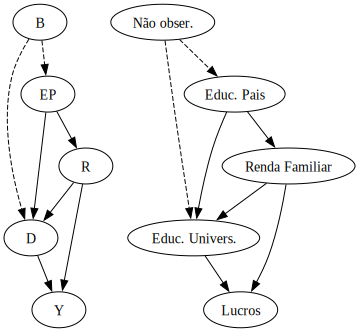

In [6]:
# Gráfico indicando as variáveis e suas relações
g = gr.Digraph()
g.edge("B", "D", style="dashed")
g.edge("B", "EP", style="dashed")
g.edge("D", "Y")
g.edge("EP", "D")
g.edge("EP", "R")
g.edge("R", "D")
g.edge("R", "Y")

# Gráfico apresentando exemplo
g.edge("Não obser.", "Educ. Univers.", style="dashed")
g.edge("Não obser.", "Educ. Pais", style="dashed")
g.edge("Educ. Univers.", "Lucros")
g.edge("Educ. Pais", "Educ. Univers.")
g.edge("Educ. Pais", "Renda Familiar")
g.edge("Renda Familiar", "Educ. Univers.")
g.edge("Renda Familiar", "Lucros")
g

Efeito Causal da educação sobre os rendimentos

* D → Y

Caminhos de porta dos fundos:

* D ← R → Y
* D ← EP → R → Y
* D ← B → EP → R → Y

O problema, porém, com caminhos de backdoor abertos é que eles criam correlações sistemáticas e independentes entre $D$ e $Y$. Dito de outra forma, a presença de caminhos de porta dos fundos abertos introduz viés na comparação entre trabalhadores instruídos e menos instruídos.

Podemos controlar a renda familiar e fechar os caminhos de porta dos fundos!

E se os fatores não observáveis (genética, ambiente familiar e capacidade mental) também afetarem o resultado?

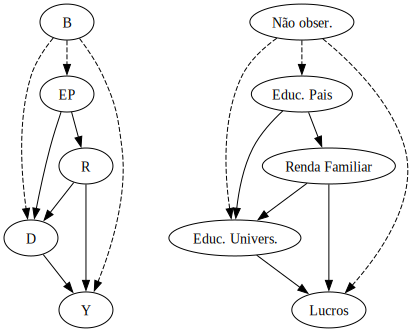

In [8]:
# Gráfico indicando as variáveis e suas relações
g = gr.Digraph()
g.edge("B", "D", style="dashed")
g.edge("B", "EP", style="dashed")
g.edge("B", "Y", style="dashed")
g.edge("D", "Y")
g.edge("EP", "D")
g.edge("EP", "R")
g.edge("R", "D")
g.edge("R", "Y")

# Gráfico apresentando exemplo
g.edge("Não obser.", "Educ. Univers.", style="dashed")
g.edge("Não obser.", "Educ. Pais", style="dashed")
g.edge("Não obser.", "Lucros", style="dashed")
g.edge("Educ. Univers.", "Lucros")
g.edge("Educ. Pais", "Educ. Univers.")
g.edge("Educ. Pais", "Renda Familiar")
g.edge("Renda Familiar", "Educ. Univers.")
g.edge("Renda Familiar", "Lucros")
g

Repare que a inclusão desse novo caminho de backdoor criou um problema porque nossa estratégia de condicionamento **não satisfaz mais o critério de backdoor**. Mesmo controlando para $R$, ainda existem correlações espúrias entre $D$ e $Y$ devido ao caminho $D ← B → Y$ da porta dos fundos. Não teremos interpretações corretas sobre a relação causal entre $D$ e $Y$.

#### DAG 5 - Viés de Seleção Amostral (Selection Bias / Collider Bias)

A inclusão da **Colisora** ($X$) que é afetada pelo tratamento ($D$) e pela variável de resultado ($Y$) é fonte de viés de seleção. Há desbalanceamento da amostra.

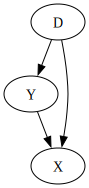

In [7]:
# Gráfico indicando as variáveis e suas relações
g = gr.Digraph()
g.edge("D", "Y")
g.edge("D", "X")
g.edge("Y", "X")
g

#### DAG 6

Outro tipo de inclusão de controle excessivo, como uma **colisora excluída da relação** (R), pode gerar mais fonte de viés.

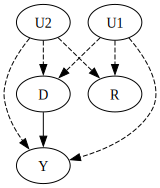

In [11]:
# Gráfico indicando as variáveis e suas relações
g = gr.Digraph()
g.edge("U1", "R", style="dashed")
g.edge("U2", "R", style="dashed")
g.edge("U1", "D", style="dashed")
g.edge("U2", "D", style="dashed")
g.edge("U1", "Y", style="dashed")
g.edge("U2", "Y", style="dashed")
g.edge("D", "Y")
g

Controlando para $R$ só piora as coisas, porque abre o terceiro e quarto caminhos dos fundos.

#### DAG 7

Exemplo de *Discriminação de gênero*. (Mediação)

* D: Discriminação
* O: Classificação Ocupacional
* Y: Salários

Assumindo que as mulheres tenham produtividade idêntica a dos homens (Não há efeito dos gêneros sobre os salários). Assim, se pudéssemos controlar o efeito da discriminação, o coeficiente da regressão apresentaria resultado nulo.

Estamos interessados ​​em estimar o efeito da própria discriminação. 

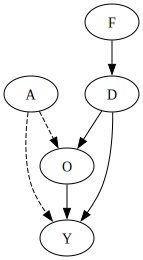

In [3]:
# Gráfico indicando as variáveis e suas relações
g = gr.Digraph()
g.edge("D", "Y")
g.edge("F", "D")
g.edge("D", "O")
g.edge("O", "Y")
g.edge("A", "Y", style="dashed")
g.edge("A", "O", style="dashed")
g

*Caminhos:*

1. D → O → Y
2. D → O ← A → Y

O primeiro caminho não é um caminho backdoor; pelo contrário, é um caminho pelo qual a **discriminação é mediada pela profissão** antes que a discriminação tenha efeito sobre os rendimentos.
* mulheres são discriminadas, o que, por sua vez, afecta os empregos que ocupam e, como resultado de ocuparem empregos marginalmente piores, as mulheres recebem menos.

O segundo caminho está relacionado a esse canal, mas é um pouco mais complicado. Neste caminho, a capacidade não observada afecta tanto os empregos que as pessoas conseguem como os seus rendimentos.

**Interpretação geral em termos de regressão**: Se regredirmos D em Y, isso produz o **efeito total da discriminação** sobre os rendimentos como do **efeito mediado da discriminação** sobre os rendimentos através da Ocupação profissional. Mas digamos que queremos **controlar a ocupação** porque queremos comparar homens e mulheres em empregos semelhantes. O **controle da ocupação** na regressão **fecha o canal de mediação**, mas depois abre o segundo canal (O é colisora!). Esta é a razão pela qual não podemos apenas controlar a ocupação. Tal controle introduz ironicamente novos padrões de viés. Logo, não possuímos uma estratégia de identificação que satisfaça o critério da porta dos fundos. 

**Considerações sobre os Viéses nas Estimações dos Efeitos Causais:**

Nós nos preocupamos com caminhos de *backdoor abertos* porque eles criam correlações sistemáticas e não causais entre a variável causal de interesse ($D$) e o resultado ($Y$). Em termos de regressão, caminhos de *backdoor abertos* introduzem viés de variável omitida e, pelo que você sabe, o viés é tão ruim que pode até inverter totalmente o sinal do coeficiente estimado. Nosso objetivo, então, é fechar esses caminhos backdoor. E se pudermos fechar todos os caminhos de backdoor abertos, então poderemos isolar o efeito causal.

* Viés de Variável Omitida (Confusora/Confounding variable): variáveis relevantes são omitidas do modelo empírico (Acontece quando o tratamento e o resultado compartilham uma causa comum). 
* Viés de Seleção (controle excessivo): Questões além da omissão simples de uma variável, agora a questão torna-se relacionada a um possível desequilíbrio na amostra (por exemplo, um desequilíbrio entre os indivíduos tratados e controle) provocado por um processo de seleção da amostra não aleatório. Nesse sentido, o pesquisador deve cuidar com a construção do modelo empírico porque a inclusão de algumas variáveis pode gerar viés de seleção (desbalanceamento na amostra).
  * Adição de Colisora (ou dependente de colisora) na regressão.
  * Adição de Mediadora (caso abra novo caminho backdoor)


### Covariáveis e Variáveis de Controle

**Definições Gerais**

A partir da teoria gráfica proposta por Judea Pearl, o efeito causal (direto) é identificado quando controlamos, minimamente, todos os caminhos de porta dos fundos (Backdoor). As variáveis que são utilizadas para controlar os caminhos de porta dos fundos são chamadas de **Variáveis de Controle**. Os termos "Covariáveis" e "Controles" (Variáveis de controle) não possuem definições estritas, ou seja, podem variar dentro de áreas de pesquisa específicas. Tecnicamente, essas **variáveis de controle** não são de interesse direto para o pesquisador. No entanto, elas são importantes para **controlar os caminhos de porta dos fundos** e, assim, isolar o efeito causal. A ideia é que a **covariável** é uma **variável de controle que "covaria"** (contínuas e medidas em um intervalo), enquanto as **variáveis de controle não covaria** (binárias ou categóricas / Nominais).

#### Good Controls
  
Os "Good Controls" são aquelas variáveis de controle que buscam cumprir com as recomendações de Pearl. Ou seja, são aquelas que afetam ao tratamento e ao resultado (confundidor). A literatura argumenta que deveríamos também adicionar controles que sejam bons preditores do resultado, mesmo que não estejam bloqueando os fatores de confusão, porque reduzem a variância das nossas estimativas. No entanto, **NÃO devemos adicionar controles** que sejam apenas **bons preditores do TRATAMENTO**, porque aumentarão a variância das estimativas dos coeficientes.

#### Bad Controls

Os "Bad Controls" são aqueles que geram viés de seleção. Exemplo clásico de Bad control é o uso da variável renda (ou PIB) é normalmente uma variável de resultado. Em outras palavras, são aquelas variáveis que costumam ser variáveis dependentes em outros estudos. (pg.47, Angrist & Pischke, 2009). Na abordagem de Pearl, são como as variáveis colisoras que abrem novos caminhos de porta dos fundos. **Proxy Control**: Se a variável proxy não for uma boa representação da variável não observada, sua inclusão no modelo de regressão pode piorar a situação, introduzindo mais viés em vez de corrigi-lo.

**Considerações gerais sobre Covariáveis e Variáveis de Controle**

Como regra geral, inclua sempre **fatores de confusão** e variáveis ​​que sejam **bons preditores de no seu modelo**. Sempre exclua variáveis ​​que sejam bons preditores apenas da variável de tratamento ($D$), atenção com mediadoras ou efeito comum do tratamento e o resultado (colisora). Outra questão relevante, o "timming" importa. Variáveis medidas antes do tratamento são boas candidatas a variáveis de controle.


